# LinearRegression и LogisticRegression

Реализовать 2 класса LinearRegression и LogisticRegression

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

params = {'figure.subplot.left': 0.07,
          'figure.figsize': (10, 10),
          'figure.subplot.right': 0.95,
          'figure.subplot.bottom': 0.07,
          'figure.subplot.top': 0.95}
plt.rcParams.update(params)

df = pd.read_csv('./data/cs-training.csv', sep=',')
df = df.dropna()
X = df.as_matrix(columns=df.columns[1:])
y = df.as_matrix(columns=df.columns[:1])
y = y.reshape(y.shape[0])
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [17]:
class LinearRegression():
    def __init__(self):
        self.epoch = 0
        self._fitted = False
        self.loss_history = []
        self._delta_W = float("inf")
        
    def _norm_and_add(self, X):
        Xn = (X - X.min()) / X.ptp(0)
        X1 = np.c_[np.ones((Xn.shape[0])), Xn]
        return X1

    def fit(self, X, y, alpha=0.01, d_alp=0.97, eps=1e-8):
        X1 = self._norm_and_add(X)
        if not self._fitted:
            self.W = np.random.uniform(size=(X1.shape[1], ))
            self._fitted = True
        while 1:
            self._delta_W = np.linalg.norm(self.W)
            preds = X1.dot(self.W)
            error = preds - y
            gradient = X1.T.dot(error) / X1.shape[0]
            self.W += - alpha * gradient
            alpha *= d_alp
            self.epoch += 1
            self.loss_history.append(np.sum(error) / X1.shape[0])
            if abs(self._delta_W - np.linalg.norm(self.W)) < eps:
                break

    def predict(self, X):
        X1 = self._norm_and_add(X)
        return X1.dot(self.W)

    def fit_predict(self, X, y, X_pred):
        self.fit(X, y)
        self.predict(X_pred)

In [9]:
class LogisticRegression():
    def __init__(self):
        self.loss_history = []
        self._fitted = False
        self._delta_W = float("inf")
        self.epoch = 0

    def _norm_and_add(self, X):
        Xn = (X - X.min()) / X.ptp(0)
        X1 = np.c_[np.ones((Xn.shape[0])), Xn]
        return X1
    
    def _sigmoid_activation(self, x):
        return 1.0 / (1 + np.exp(-x))

    def fit(self, X, y, alpha=0.1, d_alp=0.97, eps=1e-8):
        X1 = self._norm_and_add(X)
        if not self._fitted:
            self.W = np.random.uniform(size=(X1.shape[1], ))
            self._fitted = True
        while 1:
            self._delta_W = np.linalg.norm(self.W)
            preds = self._sigmoid_activation(X1.dot(self.W))
            error = preds - y
            gradient = X1.T.dot(error) / X1.shape[0]
            self.W += - alpha * gradient
            alpha *= d_alp
            self.epoch += 1
            self.loss_history.append(np.sum(error) / X1.shape[0])
            if abs(self._delta_W - np.linalg.norm(self.W)) < eps:
                break

    def predict(self, X):
        X1 = self._norm_and_add(X)
        return self._sigmoid_activation(X1.dot(self.W))

    def fit_predict(self, X, y, X_pred):
        self.fit(X, y)
        self.predict(X_pred)

In [4]:
gkf = KFold(n_splits=5, shuffle=False)

In [13]:
log = LogisticRegression()
for train, test in gkf.split(X, y):
    t1 = time.time()
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]

    log.fit(X_train, y_train, alpha=0.01, d_alp=1, eps=1e-5)
    print(roc_auc_score(y_score=log.predict(X_test), y_true=y_test))
    print("%.3fsec" % (time.time() - t1))
    print("----------------------------------")

0.454139791102
1.371sec
----------------------------------
0.470906422855
0.047sec
----------------------------------
0.477366192114
0.073sec
----------------------------------
0.633998705324
55.561sec
----------------------------------
0.638983956887
1.586sec
----------------------------------


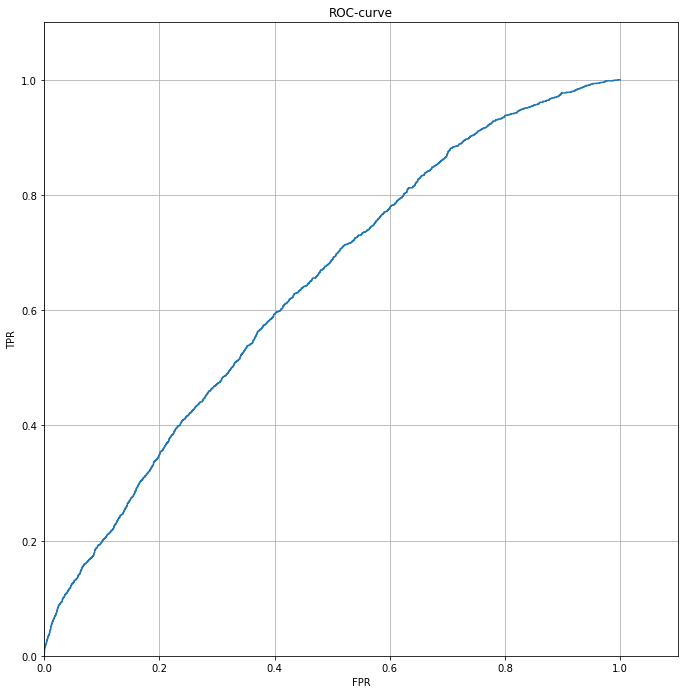

In [14]:
fpr, tpr, _ = metrics.roc_curve(y_score=log.predict(X_test), y_true=y_test)

plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')
plt.plot(fpr, tpr)
plt.show()

In [18]:
lin = LinearRegression()
for train, test in gkf.split(X, y):
    t1 = time.time()
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]

    lin.fit(X_train, y_train, d_alp=0.99, eps=1e-12)
    print(roc_auc_score(y_score=lin.predict(X_test), y_true=y_test))
    print("%.3fsec" % (time.time() - t1))
    print("----------------------------------")

0.529993972597
8.319sec
----------------------------------
0.580172212828
7.327sec
----------------------------------
0.56689102319
7.134sec
----------------------------------
0.583494597624
7.222sec
----------------------------------
0.587602675524
6.905sec
----------------------------------


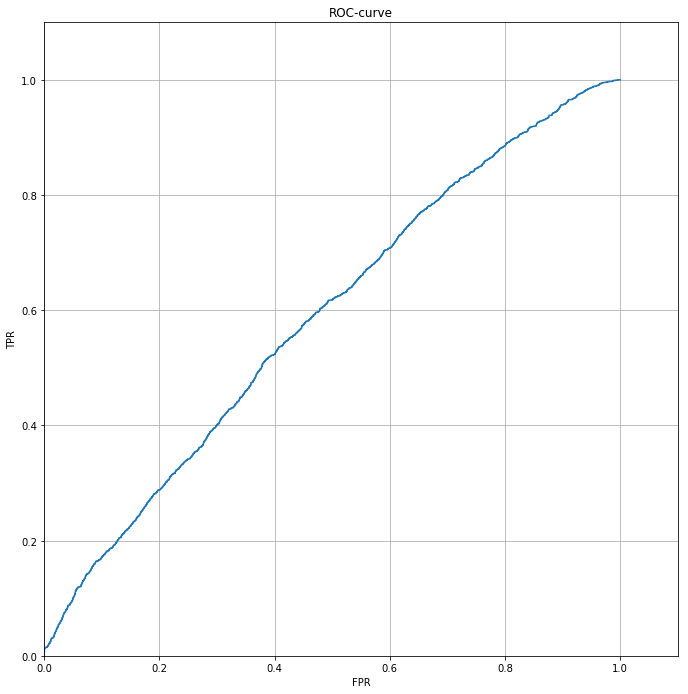

In [19]:
fpr, tpr, _ = metrics.roc_curve(y_score=lin.predict(X_test), y_true=y_test)

plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')
plt.plot(fpr, tpr)
plt.show()